## Práctica 3: Análisis de Top N
Con un dataset del país de residencia de surfistas vamos a intentar encontrar cuáles son los países de mayor procedencia de surfistas. Para esto intentaremos hacer un gráfico de Pie con las proporciones de cada país, incluyendo la categoría de otros, para no cargar el Pie Chart.

### Referencias
- https://pandas.pydata.org/docs/reference/api/pandas.unique.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
- https://pandas.pydata.org/docs/reference/api/pandas.concat.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html
- https://matplotlib.org/stable/users/explain/colors/colormaps.html
- https://github.com/lkuffo/data-viz/blob/main/PRACTICAS/practica3.ipynb

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/viajes_surfistas.csv')
df

,homename,homecontinent,homecountry,homelat,homelon,travelcontinent,travelcountry,travellat,travellon
0,Canadian in La La Land,North America,United States of America,33.930030,-118.280993,North America,United States of America,33.887255,-118.411912
1,Canadian in La La Land,North America,United States of America,33.930030,-118.280993,North America,United States of America,34.022100,-118.481000
2,Canadian in La La Land,North America,United States of America,33.930030,-118.280993,North America,United States of America,34.030400,-118.779000
3,Canadian in La La Land,North America,United States of America,33.930030,-118.280993,North America,United States of America,33.887255,-118.411912
4,Canadian in La La Land,North America,United States of America,33.930030,-118.280993,North America,United States of America,33.888889,-118.405278
...,...,...,...,...,...,...,...,...,...
9506,"Bridgetown, Western Australia",Australia,Australia,-33.954448,116.131214,Australia,Australia,-34.225000,115.017000
9507,"Lille, France",Europe,France,50.629250,3.057256,Europe,France,45.002343,-1.201475
9508,MX,South America,Mexico,23.634501,-102.552784,South America,Mexico,21.016700,-101.250000
9509,Kuta - Bali - Indonesia,Asia,Indonesia,-8.739184,115.171130,Asia,Indonesia,-8.710093,115.166845


Identificamos las columnas necesarias. En este caso seria la columna `homecountry` 

In [3]:
# Determinamos cuantos paises diferentes se tienen
df['homecountry'].unique()

array(['United States of America', 'France', 'Indonesia', 'Spain',
       'United Kingdom', 'Philippines', 'Australia', 'Germany', 'Brazil',
       'Ireland', 'Japan', 'Colombia', 'Morocco', 'Chile', 'Kuwait',
       'Uruguay', 'Italy', 'South Korea', 'Venezuela', 'India', 'Peru',
       'New Zealand', 'Mexico', 'Oman', 'Netherlands', 'Bangladesh',
       'Kenya', 'Thailand', 'Switzerland', 'Argentina', 'Lebanon',
       'Malaysia', 'Poland', 'Dominican Republic', 'Portugal', 'Jordan',
       'Canada', 'Singapore', 'Costa Rica', 'United Arab Emirates',
       'Uzbekistan', 'Qatar', 'Panama', 'Saint Barthelemy',
       'South Africa', 'Ukraine', 'Greece', 'Norway', 'Turkey',
       'French Polynesia', 'Slovenia', 'Guatemala', 'Taiwan', 'Nicaragua',
       'Ecuador', 'Hong Kong S.A.R.', 'El Salvador', 'Paraguay', 'Russia',
       'Namibia', 'Puerto Rico', 'Belgium', 'Nigeria', 'Jersey', 'Cuba',
       'China', 'Uganda', 'Belarus', 'Sri Lanka', 'Romania', 'Slovakia',
       'Sweden', 'Lux

In [4]:
# Contamos la cantidad de paises
len(df['homecountry'].unique())

101

In [5]:
# agrupamos por pais y contamos los valores de cualquier columna
agrupado = df.groupby('homecountry').agg({
    'homename': 'count'
})
agrupado

,homename
homecountry,
Andorra,1
Argentina,143
Australia,809
Austria,3
Bahrain,2
...,...
United States Virgin Islands,2
United States of America,2826
Uruguay,21


In [6]:
# Me interesa el top de paises, asi que inicialmente lo ordenamos
agrupado_ordenado = agrupado.sort_values('homename', ascending=False) # para ordenarlo de foma descendente
agrupado_ordenado

,homename
homecountry,
United States of America,2826
Japan,893
Australia,809
Spain,752
United Kingdom,496
...,...
Nepal,1
Oman,1
Pakistan,1


In [7]:
top_4 = agrupado_ordenado.head(4) # Obtenemos el Top4
top_4

,homename
homecountry,
United States of America,2826
Japan,893
Australia,809
Spain,752


In [8]:
# Necesito una categoria Otros con la suma de los demas paises. Retiramos los 4 primeros
df_otros = agrupado_ordenado.drop(index=top_4.index.values)
df_otros

,homename
homecountry,
United Kingdom,496
France,433
Brazil,379
Portugal,367
Italy,295
...,...
Nepal,1
Oman,1
Pakistan,1


In [9]:
# Realizamos la suma de todos los demas paises, pero primero hacemos una conversion para poderlo realizar
df_otros['pais'] = 'Otros'
df_otros

,homename,pais
homecountry,,
United Kingdom,496,Otros
France,433,Otros
Brazil,379,Otros
Portugal,367,Otros
Italy,295,Otros
...,...,...
Nepal,1,Otros
Oman,1,Otros
Pakistan,1,Otros


In [10]:
df_otros_agrupado = df_otros.groupby('pais').agg({
    'homename': 'sum'
})
df_otros_agrupado

,homename
pais,
Otros,4231


In [11]:
# 
df_otros_agrupado = df_otros_agrupado.reset_index()
df_otros_agrupado

,pais,homename
0,Otros,4231


In [12]:
top_4 = top_4.reset_index()
top_4

,homecountry,homename
0,United States of America,2826
1,Japan,893
2,Australia,809
3,Spain,752


Ahora tenemos que unir lod dataframes top_4 y df_otros_agrupado. Para esto deben tener el mismo nombre de las columnas

In [13]:
top_4.columns = ['pais', 'homename'] # Cambia el nombre de las columnas para que queden igual en los DF
top_4

,pais,homename
0,United States of America,2826
1,Japan,893
2,Australia,809
3,Spain,752


In [14]:
df_final = pd.concat([top_4, df_otros_agrupado])
df_final

,pais,homename
0,United States of America,2826
1,Japan,893
2,Australia,809
3,Spain,752
0,Otros,4231


Para realizar el grafico de pie es mejor que `pais` quede como indice

In [15]:
df_final = df_final.set_index('pais')
df_final

,homename
pais,
United States of America,2826
Japan,893
Australia,809
Spain,752
Otros,4231


Text(0.5, 1.0, 'Porcentaje de Surfistas por Pais de Procedencia')

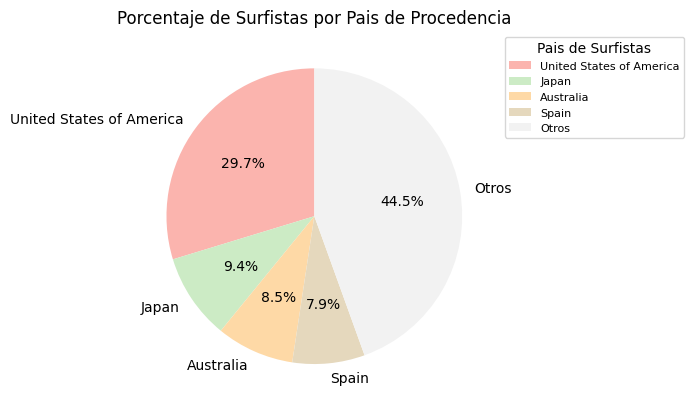

In [16]:
ax = df_final.plot.pie(
    y='homename',
    startangle=90,
    autopct='%1.1f%%',
    colormap='Pastel1'
)

ax.set_ylabel('')
ax.legend(
    title='Pais de Surfistas',
    fontsize=8,
    bbox_to_anchor=(1, 1)
)

ax.set_title('Porcentaje de Surfistas por Pais de Procedencia')

### Plotly

In [17]:
import plotly.express as px

In [18]:
df_final

,homename
pais,
United States of America,2826
Japan,893
Australia,809
Spain,752
Otros,4231


In [19]:
df_final = df_final.reset_index()
df_final

,pais,homename
0,United States of America,2826
1,Japan,893
2,Australia,809
3,Spain,752
4,Otros,4231


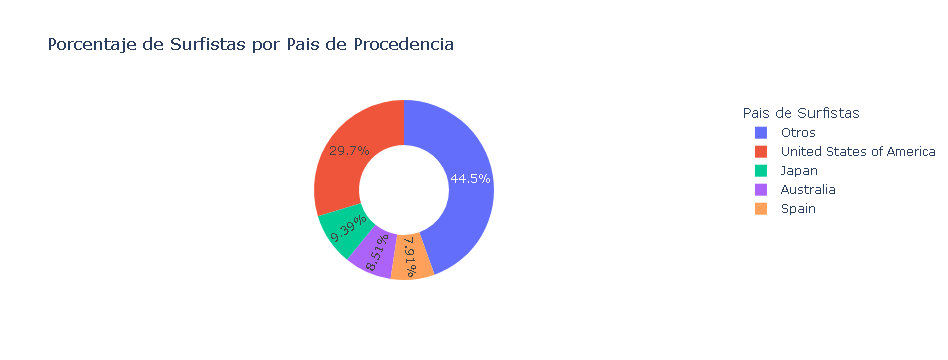

In [28]:
fig = px.pie(
    df_final,
    names= 'pais',
    values= 'homename',
    title='Porcentaje de Surfistas por Pais de Procedencia',
    hole=0.5
)
fig.update_layout(
    legend_title_text='Pais de Surfistas'
)

fig.show()